In [601]:
# Import Pandas and Import the csv file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

df= pd.read_csv('cardio_train_modified.csv')
df.head()

,ID,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393.0,male,168,62.0,110,80,1,1,0,0,1,0
1,1,20228.0,female,156,85.0,140,90,3,1,0,0,1,1
2,2,18857.0,female,165,64.0,130,70,3,1,0,0,0,1
3,3,17623.0,male,169,82.0,150,100,1,1,0,0,1,1
4,4,17474.0,female,156,56.0,100,60,1,1,0,0,0,0


In [602]:
# Convert age from Days to Year in a new feature

df['age_yr'] = df['age']/365

df.head()


,ID,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_yr
0,0,18393.0,male,168,62.0,110,80,1,1,0,0,1,0,50.391781
1,1,20228.0,female,156,85.0,140,90,3,1,0,0,1,1,55.419178
2,2,18857.0,female,165,64.0,130,70,3,1,0,0,0,1,51.663014
3,3,17623.0,male,169,82.0,150,100,1,1,0,0,1,1,48.282192
4,4,17474.0,female,156,56.0,100,60,1,1,0,0,0,0,47.873973


In [603]:
# drop original age feature

df.drop('age',axis=1,inplace=True)
df.head()

,ID,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_yr
0,0,male,168,62.0,110,80,1,1,0,0,1,0,50.391781
1,1,female,156,85.0,140,90,3,1,0,0,1,1,55.419178
2,2,female,165,64.0,130,70,3,1,0,0,0,1,51.663014
3,3,male,169,82.0,150,100,1,1,0,0,1,1,48.282192
4,4,female,156,56.0,100,60,1,1,0,0,0,0,47.873973


In [604]:
# convert gender to binary number format

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           70000 non-null  int64  
 1   gender       70000 non-null  object 
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
 12  age_yr       67849 non-null  float64
dtypes: float64(2), int64(10), object(1)
memory usage: 6.9+ MB


In [605]:
# convert 'gender' column in to 2 dummy columns.

pd.get_dummies(df['gender']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


In [606]:
#  drop first of the dummy columns
dummy_drop = pd.get_dummies(df['gender'],drop_first=True)
dummy_drop.head()

,male
0,1
1,0
2,0
3,1
4,0


In [607]:
# concat above new dummy feature 'male' in our dataframe
df = pd.concat([df, dummy_drop], axis=1)
df.head()

,ID,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_yr,male
0,0,male,168,62.0,110,80,1,1,0,0,1,0,50.391781,1
1,1,female,156,85.0,140,90,3,1,0,0,1,1,55.419178,0
2,2,female,165,64.0,130,70,3,1,0,0,0,1,51.663014,0
3,3,male,169,82.0,150,100,1,1,0,0,1,1,48.282192,1
4,4,female,156,56.0,100,60,1,1,0,0,0,0,47.873973,0


In [608]:
# Now drop the gender feature, since we have added new feature 'male' with the same information.
df.drop('gender',axis=1,inplace=True)
df.head()

,ID,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_yr,male
0,0,168,62.0,110,80,1,1,0,0,1,0,50.391781,1
1,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,0
2,2,165,64.0,130,70,3,1,0,0,0,1,51.663014,0
3,3,169,82.0,150,100,1,1,0,0,1,1,48.282192,1
4,4,156,56.0,100,60,1,1,0,0,0,0,47.873973,0


In [609]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           70000 non-null  int64  
 1   height       70000 non-null  int64  
 2   weight       70000 non-null  float64
 3   ap_hi        70000 non-null  int64  
 4   ap_lo        70000 non-null  int64  
 5   cholesterol  70000 non-null  int64  
 6   gluc         70000 non-null  int64  
 7   smoke        70000 non-null  int64  
 8   alco         70000 non-null  int64  
 9   active       70000 non-null  int64  
 10  cardio       70000 non-null  int64  
 11  age_yr       67849 non-null  float64
 12  male         70000 non-null  uint8  
dtypes: float64(2), int64(10), uint8(1)
memory usage: 6.5 MB


There are some values of age as null (70000- 67849 =2151). these are around 3% values missing in age_yr.
We can either delete these rows or imput some value for age. In this case, we will impute vlaues for null age as below:
if age is null and male =1, then insert mean value of males, else when male =0, insert mean value of females

In [610]:
# impute values in age_yr where there were null values

means = df.groupby('male').age_yr.mean()
for i in df[df.age_yr.isnull()].index:
    df.loc[i, 'age_yr'] = means[df.loc[i].male]

#sns.countplot(data= df, x = 'age_yr', palette='rocket', hue='male')
#sns.countplot(x='age_yr', data=i)


In [611]:
# check if there are no null values in age
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           70000 non-null  int64  
 1   height       70000 non-null  int64  
 2   weight       70000 non-null  float64
 3   ap_hi        70000 non-null  int64  
 4   ap_lo        70000 non-null  int64  
 5   cholesterol  70000 non-null  int64  
 6   gluc         70000 non-null  int64  
 7   smoke        70000 non-null  int64  
 8   alco         70000 non-null  int64  
 9   active       70000 non-null  int64  
 10  cardio       70000 non-null  int64  
 11  age_yr       70000 non-null  float64
 12  male         70000 non-null  uint8  
dtypes: float64(2), int64(10), uint8(1)
memory usage: 6.5 MB


In [612]:
# Drop ID row, which is of no use
#shift dependent column 'cardio' to end. this helps to delete this column in next step

df.drop(['ID'], axis = 1,inplace=True)

df = df[['height','weight','ap_hi','ap_lo','gluc','cholesterol','smoke','alco','active','age_yr','male','cardio']]
df.head()

,height,weight,ap_hi,ap_lo,gluc,cholesterol,smoke,alco,active,age_yr,male,cardio
0,168,62.0,110,80,1,1,0,0,1,50.391781,1,0
1,156,85.0,140,90,1,3,0,0,1,55.419178,0,1
2,165,64.0,130,70,1,3,0,0,0,51.663014,0,1
3,169,82.0,150,100,1,1,0,0,1,48.282192,1,1
4,156,56.0,100,60,1,1,0,0,0,47.873973,0,0


In [613]:
df.head()

,height,weight,ap_hi,ap_lo,gluc,cholesterol,smoke,alco,active,age_yr,male,cardio
0,168,62.0,110,80,1,1,0,0,1,50.391781,1,0
1,156,85.0,140,90,1,3,0,0,1,55.419178,0,1
2,165,64.0,130,70,1,3,0,0,0,51.663014,0,1
3,169,82.0,150,100,1,1,0,0,1,48.282192,1,1
4,156,56.0,100,60,1,1,0,0,0,47.873973,0,0


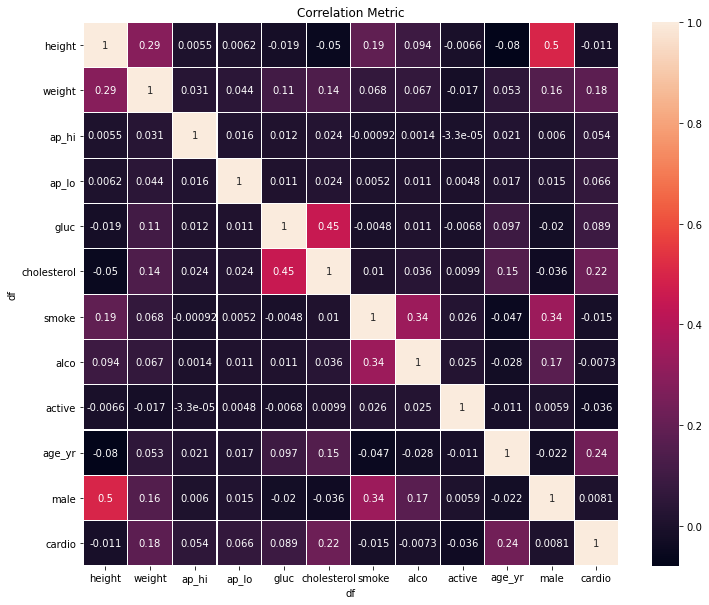

In [614]:
# Check for corelation between independent features
# This is used, so that in case there are features that are highly corelated (beyond a threshold value , say 80%), then
# we can keep just one of these features and drop rest of the highly corelated features. 
# This is called feature selection using corelation.

import seaborn as sns
correlation = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Metric')
plt.xlabel('df')
plt.ylabel('df')
plt.show()

As can be seen above, none of the features are highly corelated, hence no need to drop any feature due ot this reason.
Btw, what we see here is also that there is very low corealation between independednt and dependent feature (Is this fine? and can we still keep all the independent features? Not sure. Need to be explored. Ignored for now.

In [615]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('cardio',axis=1), 
                                                    df['cardio'], test_size=0.30, 
                                                    random_state=101)

In [616]:
df.head()

,height,weight,ap_hi,ap_lo,gluc,cholesterol,smoke,alco,active,age_yr,male,cardio
0,168,62.0,110,80,1,1,0,0,1,50.391781,1,0
1,156,85.0,140,90,1,3,0,0,1,55.419178,0,1
2,165,64.0,130,70,1,3,0,0,0,51.663014,0,1
3,169,82.0,150,100,1,1,0,0,1,48.282192,1,1
4,156,56.0,100,60,1,1,0,0,0,47.873973,0,0


In [617]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('cardio', axis=1))
scaled_features = scaler.transform(df.drop('cardio', axis=1))

df_feat = pd. DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,height,weight,ap_hi,ap_lo,gluc,cholesterol,smoke,alco,active,age_yr,male
0,0.443452,-0.847873,-0.122182,-0.088238,-0.39572,-0.539322,-0.310879,-0.238384,0.494167,-0.443223,1.364055
1,-1.018168,0.749831,0.072610,-0.035180,-0.39572,2.400793,-0.310879,-0.238384,0.494167,0.311848,-0.733108
2,0.078047,-0.708942,0.007679,-0.141297,-0.39572,2.400793,-0.310879,-0.238384,-2.023607,-0.252295,-0.733108
3,0.565254,0.541435,0.137541,0.017879,-0.39572,-0.539322,-0.310879,-0.238384,0.494167,-0.760064,1.364055
4,-1.018168,-1.264666,-0.187113,-0.194356,-0.39572,-0.539322,-0.310879,-0.238384,-2.023607,-0.821375,-0.733108


In [618]:
#Trianing and Predicting

In [619]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\sdeshkar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [620]:
predictions = logmodel.predict(X_test)

In [621]:
from sklearn.metrics import confusion_matrix

In [622]:
accuracy=confusion_matrix(y_test,predictions)

In [623]:
accuracy

array([[8044, 2499],
       [3508, 6949]], dtype=int64)

In [624]:
from sklearn.metrics import accuracy_score

In [625]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.713952380952381

In [626]:
predictions

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [627]:
# Now run the model on test dataset and check its accuracy

In [628]:
from sklearn.metrics import classification_report

In [629]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73     10543
           1       0.74      0.66      0.70     10457

    accuracy                           0.71     21000
   macro avg       0.72      0.71      0.71     21000
weighted avg       0.72      0.71      0.71     21000



In [573]:
Height = input(print ("Provide your height in cms: "))
Weight = input(print ("Provide your Weight in Kg: "))
BP_hi = input(print ("Provide your BP_high reading : "))
BP_low = input(print ("Provide your BP_Low reading : "))
Glucose = input(print ("Provide your Glucose count : "))
Chol = input(print ("Provide your Cholesterol count : "))
Smoke = input(print ("Do you smoke? 1 for yes else 0 : "))
Alco = input(print ("Do you consume Alcohol? 1 for yes else 0 : "))
Active = input(print ("Do you excersice regulary? 1 for yes else 0 : "))
Age = input(print ("Provide your age in Years : "))
Sex = input(print ("Provide your Gender 1 for male and 0 for female : "))


Provide your height in cms: 
None170
Provide your Weight in Kg: 
None74
Provide your BP_high reading : 
None140
Provide your BP_Low reading : 
None90
Provide your Glucose count : 
None150
Provide your Cholesterol count : 
None250
Do you smoke? 1 for yes else 0 : 
None1
Do you consume Alcohol? 1 for yes else 0 : 
None1
Do you excersice regulary? 1 for yes else 0 : 
None0
Provide your age in Years : 
None80
Provide your Gender 1 for male and 0 for female : 
None0


In [576]:
#input_array = [[Height,Weight,BP_hi,BP_low,Glucose,Chol,Smoke,Alco,Active,Age,Sex]]
input_array = [[Height,Weight,BP_hi,BP_low,Glucose,Chol,Smoke,Alco,Active,Age,Sex]]
input_array

[[1, '170', '74', '140', '90', '150', '250', '1', '1', '0', '80', '0']]

In [595]:
new_predict = logmodel.predict(input_array)

if (new_predict < 1):
    print (" Your health parameters are fine and ocntinue to take care of your health")
else: 
    print ("Your health is at risk and visit your doctor for futher consulatation")
#new_predict

Your health is at risk and visit your doctor for futher consulatation


C:\Users\sdeshkar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
